In [13]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
!pip install vaderSentiment wordcloud matplotlib seaborn

In [14]:
df = pd.read_csv("/content/linkedin_data.csv")
df

,CommentID,Comments,Likes,Date,Sentiment
0,1,Looking to connect with people in the streamli...,454,13-04-2025,Neutral
1,2,Just published my first blog post on IBM Machi...,16,10-02-2025,Positive
2,3,Can someone explain how streamlit apps works,377,01-05-2025,Neutral
3,4,Can someone explain how Machine Learning works,161,13-02-2025,Neutral
4,5,Completed the AWS Cloud Practitioner coursehig...,315,21-05-2025,Positive
...,...,...,...,...,...
64,180,Looking to connect with people in the time ser...,499,18-12-2024,Neutral
65,186,What are your thoughts on Cloud Computing cert...,310,05-06-2025,Neutral
66,191,Completed the Coursera Python coursehighly rec...,497,03-02-2025,Positive
67,195,What are your thoughts on Big Data certifications,42,15-05-2025,Neutral


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [18]:
def vader_sentiment(compound):
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [20]:
df['VADER_Score'] = df['Comments'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['VADER_Sentiment'] = df['VADER_Score'].apply(vader_sentiment)

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-21-b9c6864122be>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


<ipython-input-22-35b95a1ce6c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='VADER_Sentiment', order=["Positive", "Neutral", "Negative"], palette='pastel')


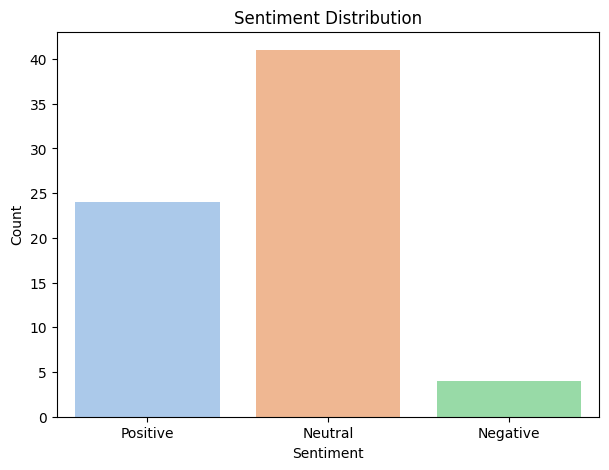

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='VADER_Sentiment', order=["Positive", "Neutral", "Negative"], palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<ipython-input-23-97240a927bd0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='VADER_Sentiment', y='Likes', order=["Positive", "Neutral", "Negative"], palette='muted')


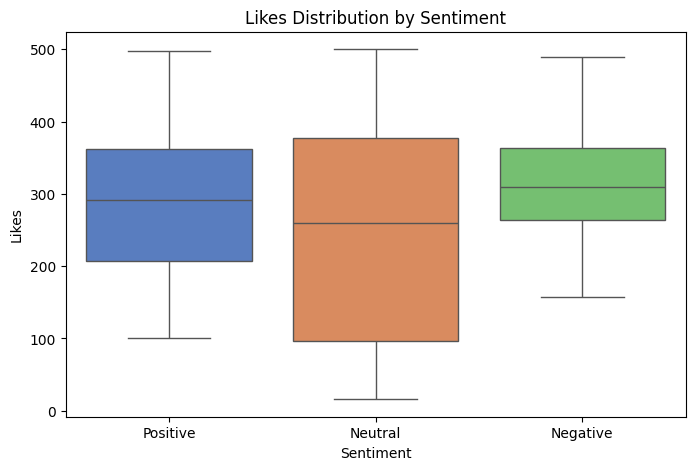

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='VADER_Sentiment', y='Likes', order=["Positive", "Neutral", "Negative"], palette='muted')
plt.title('Likes Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Likes')
plt.show()

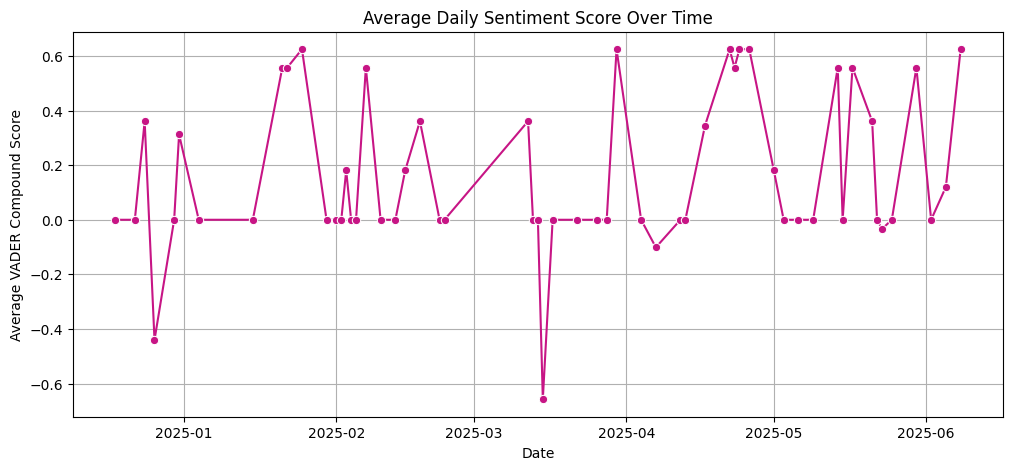

In [24]:
daily_sentiment = df.groupby('Date')['VADER_Score'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(data=daily_sentiment, x='Date', y='VADER_Score', marker='o', color='mediumvioletred')
plt.title('Average Daily Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average VADER Compound Score')
plt.grid(True)
plt.show()

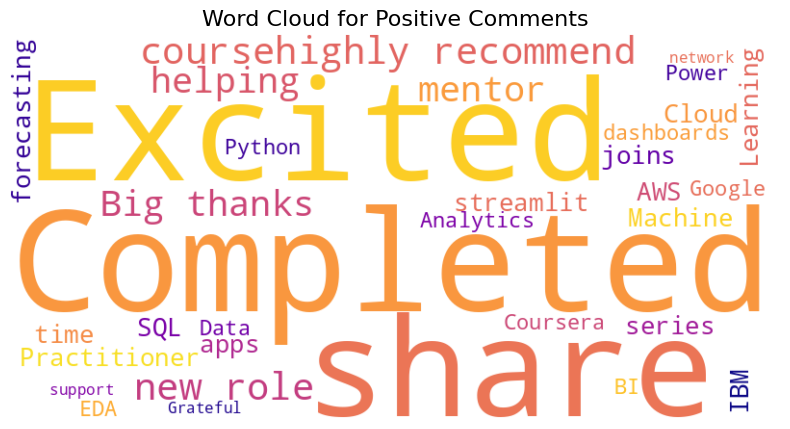

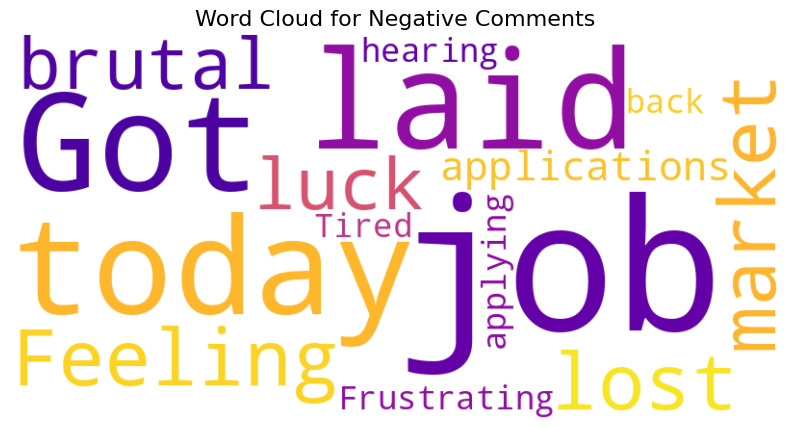

In [26]:
def plot_wordcloud(sentiment_label):
    text = " ".join(df[df['VADER_Sentiment'] == sentiment_label]['Comments'].values)
    if not text.strip():
        print(f"No {sentiment_label} comments to generate word cloud.")
        return
    wc = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(text)
    plt.figure(figsize=(10,5))
    plt.title(f"Word Cloud for {sentiment_label} Comments", fontsize=16)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
plot_wordcloud("Positive")
plot_wordcloud("Negative")

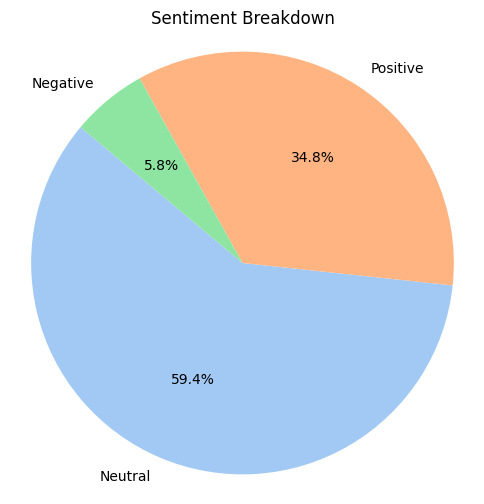

In [27]:
plt.figure(figsize=(6,6))
sentiment_counts = df['VADER_Sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Sentiment Breakdown")
plt.axis("equal")
plt.show()

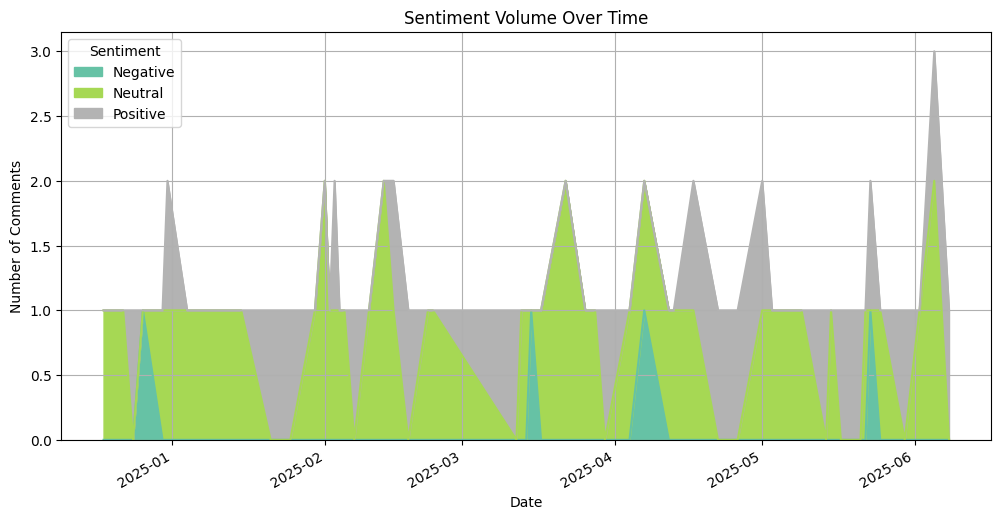

In [28]:
# Daily sentiment volume
daily_sentiment_volume = df.groupby(['Date', 'VADER_Sentiment']).size().reset_index(name='Count')
pivot_table = daily_sentiment_volume.pivot(index='Date', columns='VADER_Sentiment', values='Count').fillna(0)

# Area plot
pivot_table.plot(kind='area', stacked=True, figsize=(12,6), cmap='Set2')
plt.title("Sentiment Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()

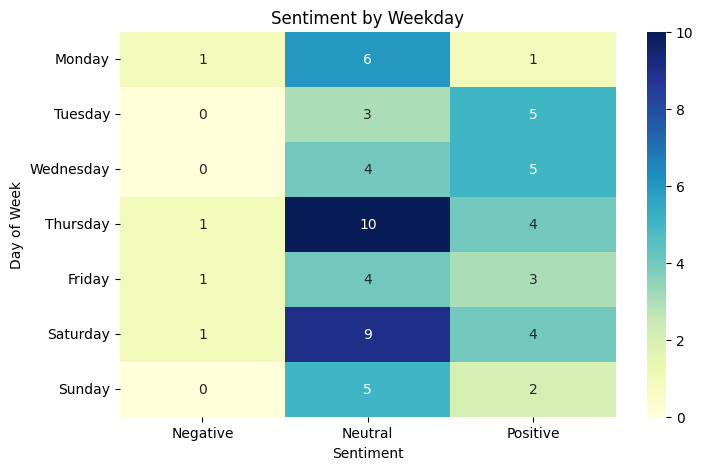

In [29]:
# Add weekday column
df['Weekday'] = df['Date'].dt.day_name()

# Cross-tab
heat_data = pd.crosstab(df['Weekday'], df['VADER_Sentiment'])

# Sort by natural weekday order
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heat_data = heat_data.reindex(weekdays_order)

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(heat_data, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Sentiment by Weekday")
plt.ylabel("Day of Week")
plt.xlabel("Sentiment")
plt.show()

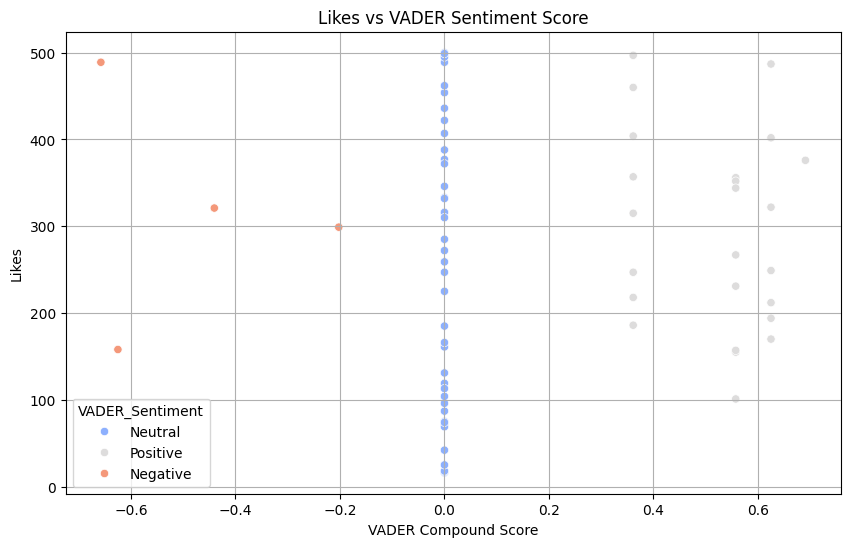

In [30]:
# Scatterplot of Likes vs Sentiment Score
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='VADER_Score', y='Likes', hue='VADER_Sentiment', palette='coolwarm')
plt.title("Likes vs VADER Sentiment Score")
plt.xlabel("VADER Compound Score")
plt.ylabel("Likes")
plt.grid(True)
plt.show()

<ipython-input-32-6edb1b23c50f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_comments['Comments'], x=top_comments['Likes'], palette='viridis')


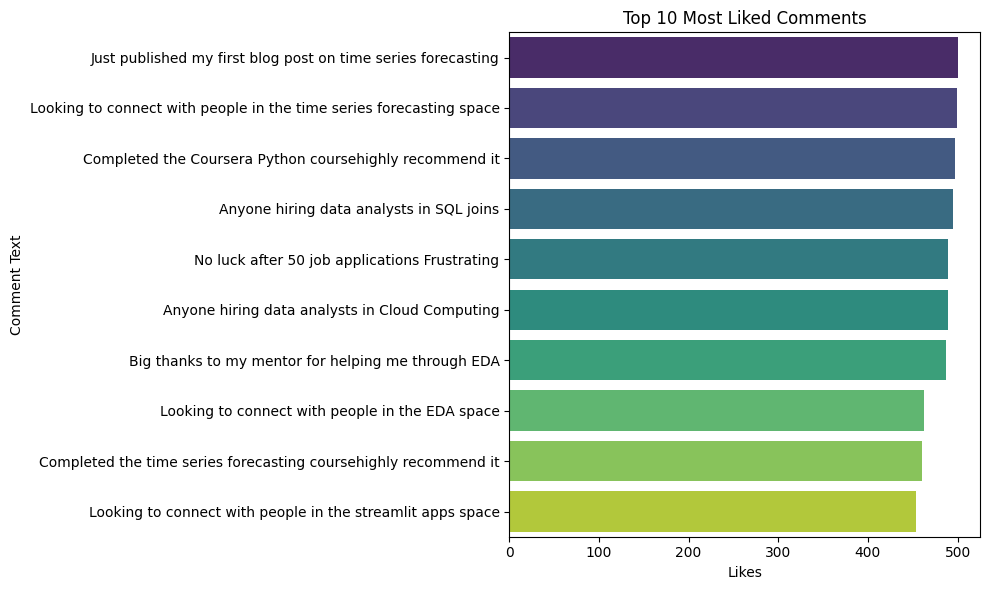

In [32]:
top_comments = df.sort_values(by='Likes', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_comments['Comments'], x=top_comments['Likes'], palette='viridis')
plt.title("Top 10 Most Liked Comments")
plt.xlabel("Likes")
plt.ylabel("Comment Text")
plt.tight_layout()
plt.show()